## PROJECT WORK

# PART 2- DATA MODELING

## Fraudulent Transactions Prediction

<img src="fraud-900.jpg" style="max-width:800px">

## Import Libraries

In [18]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import boxcox

# Visualisation
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from xgboost import plot_importance, to_graphviz
from xgboost import plot_tree
from matplotlib import pyplot

# For Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve,roc_auc_score

#For Model Acuracy
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import plot_importance, to_graphviz #
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve

#For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
#For Neural
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.ensemble import AdaBoostClassifier

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# Configure visualisations
%matplotlib inline

#For Information Value & WOE
import os
import gc
import time
import psutil
import numpy as np
import pandas as pd
import random as rn
import seaborn as sns

from tqdm import tqdm
from matplotlib import pyplot as plt
from contextlib import contextmanager

rn.seed(5)
np.random.seed(7)
os.environ['PYTHONHASHSEED'] = '3'

#For Learning Curve
from yellowbrick.model_selection import learning_curve


## Load Data

In [2]:
dataset_2= pd.read_csv('new_fraud_dataframe_modeling.csv')
dataset_2.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset_2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,bal_diff_orig,bal_diff_dest,typeId,day,weekday,sin_hour,cos_hour,sin_weekday,cos_weekday,Fraud_checkId,hour
0,1,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00,0,0,0,0.004363,0.999990,0.000000,1.000000,False,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00,0,0,0,0.004363,0.999990,0.000000,1.000000,False,0
2,1,181.00,181.00,0.00,0.00,0.00,181.00,0.00,1,0,0,0.004363,0.999990,0.000000,1.000000,True,0
3,1,181.00,181.00,0.00,21182.00,0.00,181.00,21182.00,2,0,0,0.004363,0.999990,0.000000,1.000000,True,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00,0,0,0,0.004363,0.999990,0.000000,1.000000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,339682.13,339682.13,2,30,4,-0.100188,-0.994969,0.069756,0.997564,True,1
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00,1,30,4,-0.100188,-0.994969,0.069756,0.997564,True,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,6311409.27,2,30,4,-0.100188,-0.994969,0.069756,0.997564,True,1
6362618,743,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00,1,30,4,-0.100188,-0.994969,0.069756,0.997564,True,1


# WEIGHT OF EVIDENCE (WOE) AND INFORMATION VALUE (IV) 

### Importance of Feature Selection
In this digital era, we are equipped with a humongous amount of data. However, not all features available to us are useful in every model prediction. Choosing the right features for our model is of utmost importance. Features are selected based on the predictive strength of the feature. We can quantify the predictive power of a feature using the concept of information value. 

### What is Weight of Evidence (WOE)?
The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.The weight of evidence tells the predictive power of a single feature concerning its independent feature. If any of the categories/bins of a feature has a large proportion of events compared to the proportion of non-events, we will get a high value of WoE which in turn says that that class of the feature separates the events from non-events.
- 1. WoE values for the various categories of a categorical variable can be used to impute a categorical feature and convert it into a numerical feature.
- if a continuous feature does not have a linear relationship with the log odds, the feature can be binned into groups and a new feature created by replaced each bin with its WoE value can be used instead of the original feature.
- WoE is better than one-hot encoding as one-hot encoding will need you to create h-1 new features to accommodate one categorical feature with h categories. This implies that the model will not have to predict h-1 coefficients (bi) instead of 1. However, in WoE variable transformation, we will need to calculate a single coefficient for the feature in consideration.

The formula to calculate the weight of evidence for any feature is given by

<img src="66585IV.jpg" style="max-width:800px">

### What is Information Value (IV)?
The WoE value, the WoE value tells us the predictive power of each bin of a feature. However, a single value representing the entire feature’s predictive power will be useful in feature selection. Note that the term (percentage of events – the percentage of non-events) follows the same sign as WoE hence ensuring that the IV is always a positive number.
The equation for IV is

<img src="30208woe.jpg" style="max-width:800px">

<img src="Screenshot 2022-07-14 121016.jpg" style="max-width:800px">

## Conclusion
1. WoE helps check the linear relationship of a feature with its dependent feature to be used in the model.
2. WoE is a good variable transformation method for both continuous and categorical features.
3. WoE is better than on-hot encoding as this method of variable transformation does not increase the complexity of the model.
4. IV is a good measure of the predictive power of a feature and it also helps point out the suspicious feature.


In [5]:
# Data Split for Predictors and Target
X = dataset_2.drop(['Fraud_checkId'], axis = 1)
y = dataset_2['Fraud_checkId']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (6362620, 16)
y Shape: (6362620,)


In [6]:
timer_depth = -1
@contextmanager
def timer(name):
    t0 = time.time()
    global timer_depth
    timer_depth += 1
    yield
    pid = os.getpid()
    py = psutil.Process(pid)
    memoryUse = py.memory_info()[0] / 2. ** 30
    print('----'*timer_depth + f'>>[{name}] done in {time.time() - t0:.0f} s ---> memory used: {memoryUse:.4f} GB', '')
    if(timer_depth == 0):
        print('\n')
    timer_depth -= 1

In [7]:
def cal_woe(app_train, app_train_target):
    num_events = app_train_target.sum()
    num_non_events = app_train_target.shape[0] - app_train_target.sum()

    feature_list = []
    feature_iv_list = []
    for col in app_train.columns:
        if app_train[col].unique().shape[0] == 1:
            del app_train[col]
            print('remove constant col', col)

        with timer('cope with %s' % col):
            feature_list.append(col)

            woe_df = pd.DataFrame()
            woe_df[col] = app_train[col]
            woe_df['target'] = app_train_target
            events_df = woe_df.groupby(col)['target'].sum().reset_index().rename(columns={'target' : 'events'})
            events_df['non_events'] = woe_df.groupby(col).count().reset_index()['target'] - events_df['events']
            def cal_woe(x):
                return np.log( ((x['non_events']+0.5)/num_non_events) / ((x['events']+0.5)/num_events)  )
            events_df['WOE_'+col] = events_df.apply(cal_woe, axis=1)

            def cal_iv(x):
                return x['WOE_'+col]*(x['non_events'] / num_non_events - x['events'] / num_events)
            events_df['IV_'+col] = events_df.apply(cal_iv, axis=1)

            feature_iv = events_df['IV_'+col].sum()
            feature_iv_list.append(feature_iv)

            events_df = events_df.drop(['events', 'non_events', 'IV_'+col], axis=1)
            app_train = app_train.merge(events_df, how='left', on=col)
    iv_df = pd.DataFrame()
    iv_df['feature'] = feature_list
    iv_df['IV'] = feature_iv_list
    iv_df = iv_df.sort_values(by='IV', ascending=False)
    return app_train, iv_df

In [8]:
with timer('calculate WOE and IV'):
    app_train, iv_df = cal_woe(X, y)

---->>[cope with step] done in 2 s ---> memory used: 2.8123 GB 
---->>[cope with amount] done in 229 s ---> memory used: 1.4274 GB 
---->>[cope with oldbalanceOrg] done in 81 s ---> memory used: 1.2197 GB 
---->>[cope with newbalanceOrig] done in 117 s ---> memory used: 1.2889 GB 
---->>[cope with oldbalanceDest] done in 156 s ---> memory used: 1.3509 GB 
---->>[cope with newbalanceDest] done in 151 s ---> memory used: 1.3912 GB 
---->>[cope with bal_diff_orig] done in 128 s ---> memory used: 1.4022 GB 
---->>[cope with bal_diff_dest] done in 169 s ---> memory used: 1.4487 GB 
---->>[cope with typeId] done in 3 s ---> memory used: 1.4369 GB 
---->>[cope with day] done in 3 s ---> memory used: 1.4844 GB 
---->>[cope with weekday] done in 3 s ---> memory used: 1.5318 GB 
---->>[cope with sin_hour] done in 4 s ---> memory used: 1.5681 GB 
---->>[cope with cos_hour] done in 4 s ---> memory used: 1.6157 GB 
---->>[cope with sin_weekday] done in 4 s ---> memory used: 1.6631 GB 
---->>[cope w

In [9]:
iv_df

,feature,IV
2,oldbalanceOrg,7.655610
6,bal_diff_orig,7.068058
0,step,5.742761
12,cos_hour,5.655061
8,typeId,5.547062
11,sin_hour,4.432513
1,amount,2.549615
9,day,1.767640
10,weekday,0.701380
13,sin_weekday,0.701380


#### Inference:
- Information Value (IV) is calculated for all features in the extended dataset in order to estimate their potential contribution to detectability
- This is an indicator of feature quality and reasoning for feature selection

# Min-Max Scaler

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

We have used this scaling technique as it help us to remove the negative values as well as shrink the large matrices. A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

**Why to normalize prior to model fitting?**

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

# Box-Cox Transformation

The Cox Box transformation is to transform the data so that its distribution is as close to a normal distribution as possible, that is, the histogram looks like a bell.

This technique has its place in feature engineering because not all species of predictive models are robust to skewed data, so it is worth using when experimenting. It probably won’t provide a spectacular improvement, although at the fine-tuning stage it can serve its purpose by improving our evaluation metric.

boxcox requires the input data to be positive. Sometimes a Box-Cox transformation provides a shift parameter to achieve this; boxcox does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

A box-cox transformation is a commonly used method for transforming a non-normally distributed dataset into a more normally distributed one.

The basic idea behind this method is to find some value for λ such that the transformed data is as close to normally distributed as possible, using the following formula:

y(λ) = (yλ – 1) / λ  if y ≠ 0
y(λ) = log(y)  if y = 0

We can also find the exact lambda value used to perform the Box-Cox transformation.

As based on the box plots of Part1 EDA it can also be concluded that none of the features is symmetrically distributed. 

Additionally, box plots indicate that features amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest are highly skewed, and they should be further processed before training machine learning models. The Box–Cox transformation of the SciPy package is applied to transform these features closer to a normal distribution.

**We will perform Box Cox Transformation on amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest as these are important variables and are not normally distributed.

In [3]:
data= dataset_2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'bal_diff_orig',
                'bal_diff_dest']]

In [4]:
col= ['amount_tr', 'oldbalanceOrg_tr', 'newbalanceOrig_tr', 'oldbalanceDest_tr', 'newbalanceDest_tr', 'bal_diff_orig_tr',
                'bal_diff_dest_tr']

In [5]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
dataset1 = pipeline.fit_transform(data)

In [6]:
# convert the array back to a dataframe
scaled_df = pd.DataFrame(dataset1, columns=col)
scaled_df

,amount_tr,oldbalanceOrg_tr,newbalanceOrig_tr,oldbalanceDest_tr,newbalanceDest_tr,bal_diff_orig_tr,bal_diff_dest_tr
0,-0.969426,0.048516,0.001885,-0.788435,-0.830805,-0.418888,-0.929566
1,-1.068082,-0.450014,-0.455200,-0.788435,-0.830805,-0.729994,-0.929566
2,-1.089268,-0.527806,-0.524019,-0.788435,-0.830805,-0.800624,-0.929566
3,-1.089268,-0.527806,-0.524019,-0.745493,-0.830805,-0.800624,-0.698512
4,-0.947202,-0.376826,-0.418549,-0.788435,-0.830805,-0.352727,-0.929566
...,...,...,...,...,...,...,...
6362615,1.390245,0.520406,-0.524019,-0.788435,-0.265937,1.990119,1.364409
6362616,2.441226,2.719405,-0.524019,-0.788435,-0.830805,2.008086,-0.929566
6362617,2.441226,2.719405,-0.524019,-0.651788,2.154113,2.008086,2.456089
6362618,2.269756,1.490945,-0.524019,-0.788435,-0.830805,2.008074,-0.929566


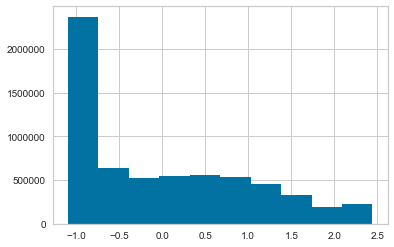

In [8]:
# histograms of the variables
plt.hist(scaled_df['amount_tr'])
plt.ticklabel_format(style='plain') 
plt.show()

In [9]:
scaled_df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
amount_tr,0.679905,-0.689401
oldbalanceOrg_tr,2.010414,2.491869
newbalanceOrig_tr,1.935560,2.230177
oldbalanceDest_tr,1.024973,-0.370455
newbalanceDest_tr,0.962855,-0.457838
bal_diff_orig_tr,0.941587,-0.697033
bal_diff_dest_tr,0.759128,-0.590474


#### Inference:
* As rule of thumb, skewness can be interpreted like this: 
|        |          |
| :---: | :---: |
| **Fairly Symmetrical** | -0.5 to 0.5 |
| **Moderate Skewed** | -0.5 to -1.0 and 0.5 to 1.0 |
| **Highly Skewed** | < -1.0 and > 1.0 |

So, as per above our oldbalanceOrg_tr, newbalanceOrig_tr & oldbalanceDest_tr are Highly Skewed. After working with alot of normalization technique Box-Cox transformation give us good result.

In [7]:
new_df= pd.concat([dataset_2, scaled_df], axis=1)
new_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,bal_diff_orig,bal_diff_dest,typeId,day,...,cos_weekday,Fraud_checkId,hour,amount_tr,oldbalanceOrg_tr,newbalanceOrig_tr,oldbalanceDest_tr,newbalanceDest_tr,bal_diff_orig_tr,bal_diff_dest_tr
0,1,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00,0,0,...,1.000000,False,0,-0.969426,0.048516,0.001885,-0.788435,-0.830805,-0.418888,-0.929566
1,1,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00,0,0,...,1.000000,False,0,-1.068082,-0.450014,-0.455200,-0.788435,-0.830805,-0.729994,-0.929566
2,1,181.00,181.00,0.00,0.00,0.00,181.00,0.00,1,0,...,1.000000,True,0,-1.089268,-0.527806,-0.524019,-0.788435,-0.830805,-0.800624,-0.929566
3,1,181.00,181.00,0.00,21182.00,0.00,181.00,21182.00,2,0,...,1.000000,True,0,-1.089268,-0.527806,-0.524019,-0.745493,-0.830805,-0.800624,-0.698512
4,1,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00,0,0,...,1.000000,False,0,-0.947202,-0.376826,-0.418549,-0.788435,-0.830805,-0.352727,-0.929566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,339682.13,339682.13,2,30,...,0.997564,True,1,1.390245,0.520406,-0.524019,-0.788435,-0.265937,1.990119,1.364409
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00,1,30,...,0.997564,True,1,2.441226,2.719405,-0.524019,-0.788435,-0.830805,2.008086,-0.929566
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,6311409.27,2,30,...,0.997564,True,1,2.441226,2.719405,-0.524019,-0.651788,2.154113,2.008086,2.456089
6362618,743,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00,1,30,...,0.997564,True,1,2.269756,1.490945,-0.524019,-0.788435,-0.830805,2.008074,-0.929566


In [138]:
# Data Split for Predictors and Target
X = new_df.drop(['Fraud_checkId'], axis = 1)
y = new_df['Fraud_checkId']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (6362620, 23)
y Shape: (6362620,)


In [139]:
with timer('calculate WOE and IV'):
    app_train, iv_df = cal_woe(X, y)

---->>[cope with step] done in 61 s ---> memory used: 2.9690 GB 
---->>[cope with amount] done in 295 s ---> memory used: 1.6411 GB 
---->>[cope with oldbalanceOrg] done in 85 s ---> memory used: 1.5008 GB 
---->>[cope with newbalanceOrig] done in 115 s ---> memory used: 1.5608 GB 
---->>[cope with oldbalanceDest] done in 150 s ---> memory used: 1.6170 GB 
---->>[cope with newbalanceDest] done in 149 s ---> memory used: 1.6686 GB 
---->>[cope with bal_diff_orig] done in 129 s ---> memory used: 1.7054 GB 
---->>[cope with bal_diff_dest] done in 166 s ---> memory used: 1.6914 GB 
---->>[cope with typeId] done in 5 s ---> memory used: 1.7509 GB 
---->>[cope with day] done in 4 s ---> memory used: 1.7984 GB 
---->>[cope with weekday] done in 4 s ---> memory used: 1.8184 GB 
---->>[cope with sin_hour] done in 10 s ---> memory used: 1.8889 GB 
---->>[cope with cos_hour] done in 43 s ---> memory used: 1.7204 GB 
---->>[cope with sin_weekday] done in 122 s ---> memory used: 1.1754 GB 
---->>[c

In [140]:
#After Box Cox Transformation
iv_df

,feature,IV
2,oldbalanceOrg,7.655610
17,oldbalanceOrg_tr,7.654302
21,bal_diff_orig_tr,7.286570
6,bal_diff_orig,7.068058
0,step,5.742761
12,cos_hour,5.655061
8,typeId,5.547062
11,sin_hour,4.432513
1,amount,2.549615
16,amount_tr,2.540922


# Model Deployment

# Data Splitting

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

As our objective is to find the variables which are contributing towards the more fraud transaction prediction as well as 'bal_diff_orig' or 'diff_category' which is important.
We dont required isFlaggedFraud as it is just an outcome of current algorithm.
Here, we will take:-

X= ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','dest_account', 'bal_diff_orig', 'bal_diff_dest','diff_category', 'typeId', 'errorBalanceOrig','errorBalanceDest']

y= ['isFraud']

In [8]:
new_df1= new_df[['step','amount_tr','oldbalanceOrg_tr','newbalanceOrig_tr','oldbalanceDest_tr','newbalanceDest_tr',
                 'typeId', 'sin_hour', 'cos_hour', 'bal_diff_orig', 'day', 'weekday','Fraud_checkId']]

In [9]:
# Data Split for Predictors and Target
X = new_df1.drop(['Fraud_checkId'], axis = 1)
y = new_df1['Fraud_checkId']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (6362620, 12)
y Shape: (6362620,)


In [10]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4453834, 12) (4453834,)
Testing Data Shape: (1908786, 12) (1908786,)


**Note:**
- Having obtained evidence from the plots that the data now contains features that make fraudulent transactions clearly detectable.
- Since the data is highly skewed, we use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). This is because the AUPRC is more sensitive to differences between algorithms and their parameter settings rather than the AUROC


## Model Accuracy
We will check model performance on different evaluation of a machine learning model
1. Confusion Matrix- The confusion matrix provides a base to define and develop any of the evaluation metrics. 
    True Positive: Actually positive (ground truth), predicted as positive (correctly classified)
    True Negative: Actually negative (ground truth), predicted as negative (correctly classified)
    False Positive: Actually negative (ground truth), predicted as positive (misclassified)
    False Negative: Actually positive (ground truth), predicted as negative (misclassified)
    
2. Accuracy- Accuracy can also be defined as the ratio of the number of correctly classified cases to the total of cases under evaluation. The best value of accuracy is 1 and the worst value is 0.

3. Precision- Precision can be defined with respect to either of the classes. The precision of negative class is intuitively the ability of the classifier not to label as positive a sample that is negative. The precision of positive class is intuitively the ability of the classifier not to label as negative a sample that is positive. The best value of precision is 1 and the worst value is 0.

4. Recall- Recall can also be defined with respect to either of the classes. Recall of positive class is also termed sensitivity and is defined as the ratio of the True Positive to the number of actual positive cases. It can intuitively be expressed as the ability of the classifier to capture all the positive cases. It is also called the True Positive Rate (TPR).Recall of negative class is also termed specificity and is defined as the ratio of the True Negative to the number of actual negative cases. It can intuitively be expressed as the ability of the classifier to capture all the negative cases. It is also called True Negative Rate (TNR).The best value of recall is 1 and the worst value is 0. 

5. F1-score- F1-score is considered one of the best metrics for classification models regardless of class imbalance. F1-score is the weighted average of recall and precision of the respective class. Its best value is 1 and the worst value is 0.

6. Precision-Recall Curve- The precision-recall curve is used for evaluating the performance of binary classification algorithms. It is often used in situations where classes are heavily imbalanced. Also like ROC curves, precision-recall curves provide a graphical representation of a classifier’s performance across many thresholds, rather than a single value (e.g., accuracy, f-1 score, etc.).Average precision is one way of calculating the area under the PR curve. Average precision indicates whether your model can correctly identify all the positive examples without accidentally marking too many negative examples as positive.

7. Hamming Loss- Hamming loss is the fraction of targets that are misclassified. The best value of the hamming loss is 0 and the worst value is 1.

8. Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value. A Log Loss of 0.69 may be good in a multiclass problem, but very bad in a binary biased case. This figure is obtained by predicting p = 0.5 for any class of a binary problem.Log Loss would not be the best metric to use in that unbalanced case.

9. An ROC curve shows the relationship between clinical sensitivity and specificity for every possible cut-off. The ROC curve is a graph with: The x-axis showing 1 – specificity (= false positive fraction = FP/(FP+TN)) The y-axis showing sensitivity (= true positive fraction = TP/(TP+FN)). For example, a decision tree determines the class of a leaf node from the proportion of instances at the node. Interpreting the ROC curve. The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance.

ROC or Receiver Operating Characteristic plot is used to visualise the performance of a binary classifier. It gives us the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.

True Positive Rate:
True Positive Rate is the proportion of observations that are correctly predicted to be positive.

False Positive Rate:
False Positive Rate is the proportion of observations that are incorrectly predicted to be positive.

## Model Building

## Building ML models For classification

1. Random Forest Classifier
2. AdaBoostClassifier
3. Extreme Gradient Boosting (XGBoost)

In [11]:
#For Precision Recall Curve
def PRCurve(model):
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

In [12]:
#multi-class log-loss
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [15]:
# Choosing the best model
Accuracy_cfm = []
Precision_cfm = []
Recall_cfm = []
Fscore_cfm =[]
logloss_cfm =[]
scores_neural=[]
hamming_loss_cfm=[]
loss_neural=[]

# 1. Random Forest Classifier

Accuracy Score (Train Data): 0.999
Accuracy Score (Test Data): 0.999
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1906342
        True       0.98      0.37      0.54      2444

    accuracy                           1.00   1908786
   macro avg       0.99      0.69      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786



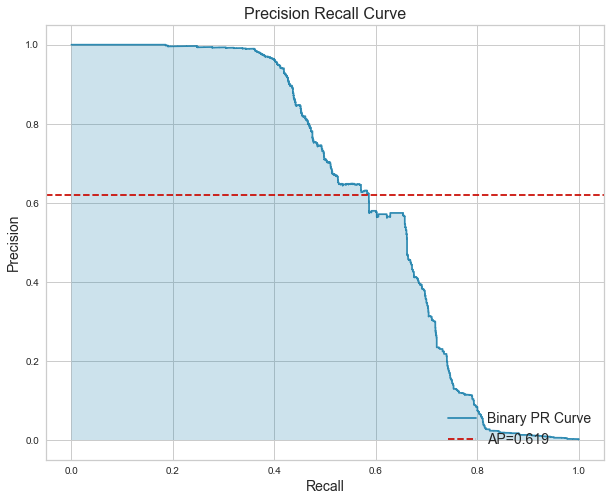

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.971


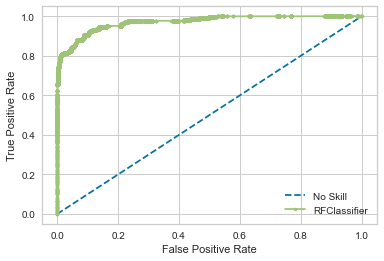

Confusion Matrix 
 [[1906323      19]
 [   1535     909]]


In [16]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
#Predict Probabilities
y_prob= rfc.predict_proba(X_test)

print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

base_random_forest_report = classification_report(y_test, y_pred)
print(base_random_forest_report)

#Plot PR CURVE
plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

#Plot ROC CURVE
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
y_prob1 = y_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, y_prob1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_prob1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rfc_fpr, rfc_tpr, marker='.', label='RFClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#confusion Matrix
conf_matrix_rf= metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', conf_matrix_rf)

#PLotting Learning curves for Machine Algorithms
#print(learning_curve(rfc, X_train, y_train, cv=10, scoring='accuracy'))

#Report save
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, y_pred) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, y_pred, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, y_pred, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test, y_pred, pos_label=1))
#logloss
logloss_cfm.append(multiclass_logloss(y_test, y_prob))
#hammingloss
hamming_loss_cfm.append(metrics.hamming_loss(y_test, y_pred))

#### Inferences:
* The Precision Recall Curve is not quit good. 
* We got the accuracy of 100% but the f1 score is very less.
* Confusion Matrix is also showing alot in False Negative and False Positive

# 2. AdaBoost Classifier

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1906342
        True       0.93      0.88      0.91      2444

    accuracy                           1.00   1908786
   macro avg       0.97      0.94      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



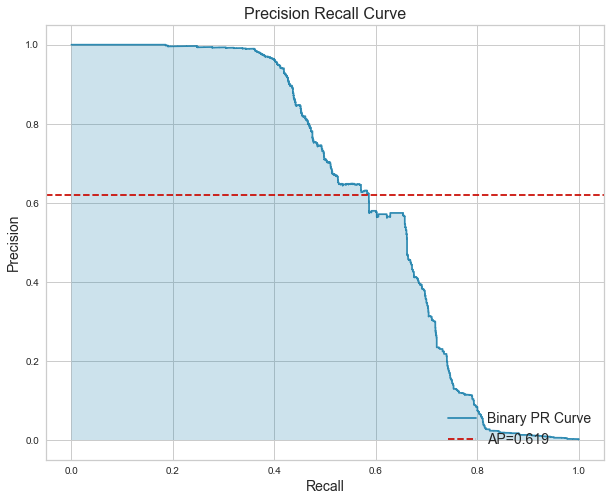

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.999


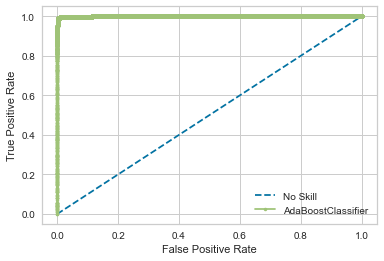

Confusion Matrix 
 [[1906192     150]
 [    296    2148]]


In [20]:
# Create adaboost classifer object
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 5)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, base_estimator=dtc)
# Train Adaboost Classifer
abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = abc.predict(X_test)
y_prob= abc.predict_proba(X_test)

print('Accuracy Score (Train Data):', np.round(abc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(abc.score(X_test, y_test), decimals = 3))

base_adaboost = classification_report(y_test, y_pred)
print(base_adaboost)

plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

#Plot ROC CURVE
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
y_prob1 = y_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
ada_auc = roc_auc_score(y_test, y_prob1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (ada_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, y_prob1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoostClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#confusion Matrix
conf_matrix_abc= metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', conf_matrix_abc)

#PLotting Learning curves for Machine Algorithms
#print(learning_curve(abc, X_train, y_train, cv=10, scoring='accuracy'))

#Report save
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, y_pred) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, y_pred, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, y_pred, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test, y_pred, pos_label=1))
#logloss
logloss_cfm.append(multiclass_logloss(y_test, y_prob))
#hammingloss
hamming_loss_cfm.append(metrics.hamming_loss(y_test, y_pred))

#### Inference:
* The model has shown better result than the first one the accuracy is 100% but the f1 score is better than the previous one.
* Confusion Matrix is also better than the previous one.
* ROC Curve has also shown better result.

# 3. Extreme Gradient Boosting (XGBoost)

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1906342
        True       0.97      0.87      0.92      2444

    accuracy                           1.00   1908786
   macro avg       0.99      0.94      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786



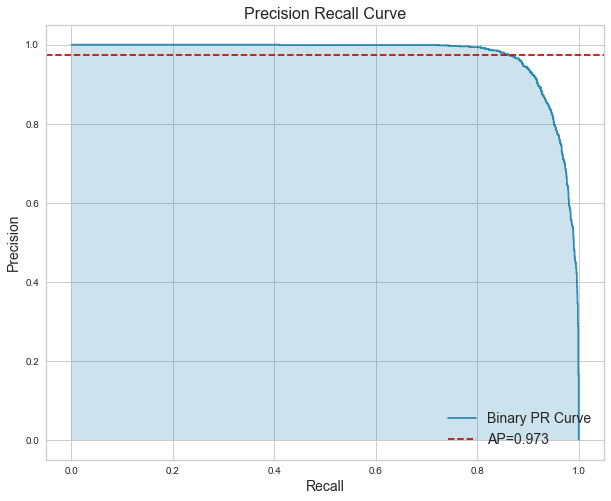

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=1.000


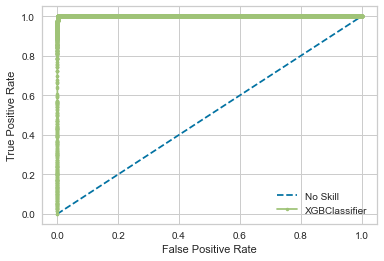

Confusion Matrix 
 [[1906277      65]
 [    314    2130]]


In [21]:
base_clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
base_clf.fit(X_train, y_train)
y_pred = base_clf.predict(X_test)
y_prob= base_clf.predict_proba(X_test)

print('Accuracy Score (Train Data):', np.round(base_clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(base_clf.score(X_test, y_test), decimals = 3))

base_XGB_report = classification_report(y_test, y_pred)
print(base_XGB_report)

plt.figure(figsize = [10, 8])
PRCurve(model = base_clf)
plt.show()

#Plot ROC CURVE
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
y_prob1 = y_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, y_prob1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_prob1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#confusion Matrix
conf_matrix_xgb= metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', conf_matrix_xgb)

#PLotting Learning curves for Machine Algorithms
#print(learning_curve(base_clf, X_train, y_train, cv=10, scoring='accuracy'))

#Report save
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, y_pred) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, y_pred, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, y_pred, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test, y_pred, pos_label=1))
#logloss
logloss_cfm.append(multiclass_logloss(y_test, y_prob))
#hammingloss
hamming_loss_cfm.append(metrics.hamming_loss(y_test, y_pred))

#### Inference:
* Well the accuracy of the model is same but here the f1 score is more better than the previous one.
* ROC Curve is showing that the model has predicted the best result.

# ROC Curve between Models

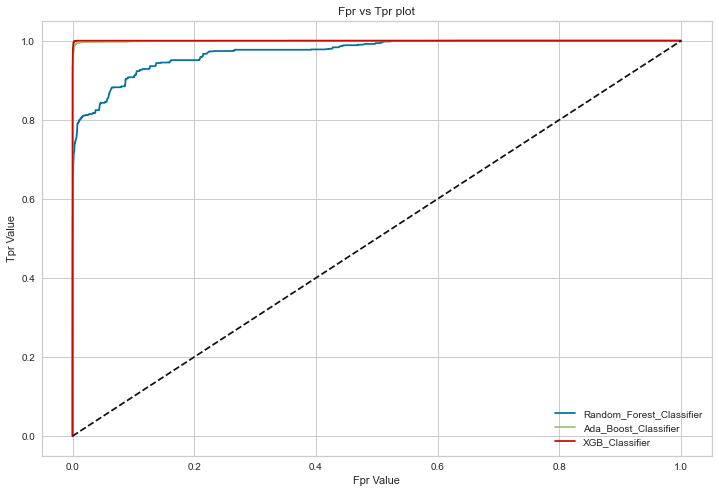

In [22]:
# Calculate FPR, TPR, THRESHOLD for Random Forest Classifier 
y_pred_probarfc = rfc.predict_proba(X_test)[:,1]
fprrfc, tprrfc, thresholdsrfc = roc_curve(y_test, y_pred_probarfc)

# Calculate FPR, TPR, THRESHOLD for Ada Boost Classifier 
y_pred_probaabc = abc.predict_proba(X_test)[:,1]
fprabc, tprabc, thresholdsabc = roc_curve(y_test, y_pred_probaabc)

# Calculate FPR, TPR, THRESHOLD for XGB Classifier 
y_pred_probarf = base_clf.predict_proba(X_test)[:,1]
fprxgb, tprxgb, thresholdsxgb = roc_curve(y_test, y_pred_probarf)

roc_plot_df = pd.DataFrame({
    "FPR": [fprrfc, fprabc, fprxgb],
    "TPR": [tprrfc, tprabc, tprxgb],
})


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fprrfc,tprrfc)
ax.plot(fprabc,tprabc)
ax.plot(fprxgb,tprxgb)
ax.plot([0,1],[0,1],'k--')
ax.grid(True)
ax.set_title('Fpr vs Tpr plot')
ax.legend(['Random_Forest_Classifier', 'Ada_Boost_Classifier', 'XGB_Classifier'])
ax.xaxis.set_label_text('Fpr Value')
ax.yaxis.set_label_text('Tpr Value')

plt.show()



#### Inference:
* XGB Classifier is showing best ROC Curve that is the model has predicted correctly. TPR is high that is observations that are correctly predicted to be positive.
* The theoretical range of the AUC ROC curve score is between 0 and 1, the actual scores of meaningful classifiers are greater than 0.5, which is the AUC ROC curve score of a random classifier.

# Ensemble methods based fraud detection—results

In [23]:
TN = [conf_matrix_rf[0,0], conf_matrix_abc[0,0], conf_matrix_xgb[0,0]]
FP = [conf_matrix_rf[0,1], conf_matrix_abc[0,1], conf_matrix_xgb[0,1]]
FN = [conf_matrix_rf[1,0], conf_matrix_abc[1,0], conf_matrix_xgb[1,0]]
TP = [conf_matrix_rf[1,1], conf_matrix_abc[1,1], conf_matrix_xgb[1,1]]

Classification = ["Random Forest Classifier", "Ada Boost Classifier", 
                  "XGB Classifier"]
list_matrix = [Classification, TN, FP, FN, TP]
list_headers = ["Model", "TN", "FP", "FN", "TP"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
cm_table=pd.DataFrame(data_dict)
cm_table

,Model,TN,FP,FN,TP
0,Random Forest Classifier,1906323,19,1535,909
1,Ada Boost Classifier,1906192,150,296,2148
2,XGB Classifier,1906277,65,314,2130


In [24]:
rf_cm= conf_matrix_rf/np.sum(conf_matrix_rf)
abc_cm= conf_matrix_abc/np.sum(conf_matrix_abc)
xgb_cm= conf_matrix_xgb/np.sum(conf_matrix_xgb)

In [25]:
#In Percentage
TN = [rf_cm[0,0], abc_cm[0,0], xgb_cm[0,0]]
FP = [rf_cm[0,1], abc_cm[0,1], xgb_cm[0,1]]
FN = [rf_cm[1,0], abc_cm[1,0], xgb_cm[1,0]]
TP = [rf_cm[1,1], abc_cm[1,1], xgb_cm[1,1]]

Classification = ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"]
list_matrix = [Classification, TN, FP, FN, TP]
list_headers = ["Model", "TN", "FP", "FN", "TP"]
zipped = list(zip(list_headers, list_matrix))
data_dict1 = dict(zipped)
cm_table_prcnt=pd.DataFrame(data_dict1)
cm_table_prcnt

,Model,TN,FP,FN,TP
0,Random Forest Classifier,0.998710,0.000010,0.000804,0.000476
1,Ada Boost Classifier,0.998641,0.000079,0.000155,0.001125
2,XGB Classifier,0.998686,0.000034,0.000165,0.001116


#### Inference:
* The false positive and false negative is less under XGB Classifier allover. The TN and TP is quite satisfactory.

## Evaluation on the Model Classification Report

In [26]:
result_df_scale_1= pd.DataFrame(Accuracy_cfm, index= ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"], 
                              columns=['Accuracy']) 
result_df_scale_2= pd.DataFrame(Precision_cfm, index= ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"], 
                              columns=['Precision'])
result_df_scale_3= pd.DataFrame(Recall_cfm, index= ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"], 
                              columns=['Recall'])
result_df_scale_4= pd.DataFrame(Fscore_cfm, index= ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"], 
                              columns=['F_score'])
result_df_scale_5= pd.DataFrame(logloss_cfm, index= ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"], 
                              columns=['log-loss'])
result_df_scale_6= pd.DataFrame(hamming_loss_cfm, index= ["Random Forest Classifier", "Ada Boost Classifier","XGB Classifier"], 
                              columns=['Hamming_loss'])

In [27]:
Model_scale = pd.concat([result_df_scale_1, result_df_scale_2, result_df_scale_3, 
                         result_df_scale_4, result_df_scale_5, result_df_scale_6], axis=1)

In [28]:
Model_scale.sort_values(by=['Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F_score,log-loss,Hamming_loss
XGB Classifier,99.980144,0.970387,0.871522,0.918301,0.007446,0.000199
Ada Boost Classifier,99.976634,0.934726,0.878887,0.905947,0.001950,0.000234
Random Forest Classifier,99.918587,0.979526,0.371931,0.539146,0.004716,0.000814


#### Inference:
* So allover XGB Classifier is giving us best accuracy and F1 score, log-loss & hamming loss are best in this model. 

**So, For our final model we will take XGB Classifier.**

# Finalizing Model Choice & Full Training

So, from all the above model we came to know that XGB Classifier is giving us good accuracy with least Hamming loss and well log-loss value.

In [29]:
XGB_class= XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)

In [41]:
new_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,bal_diff_orig,bal_diff_dest,typeId,day,...,cos_weekday,Fraud_checkId,hour,amount_tr,oldbalanceOrg_tr,newbalanceOrig_tr,oldbalanceDest_tr,newbalanceDest_tr,bal_diff_orig_tr,bal_diff_dest_tr
0,1,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00,0,0,...,1.000000,False,0,-0.969426,0.048516,0.001885,-0.788435,-0.830805,-0.418888,-0.929566
1,1,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00,0,0,...,1.000000,False,0,-1.068082,-0.450014,-0.455200,-0.788435,-0.830805,-0.729994,-0.929566
2,1,181.00,181.00,0.00,0.00,0.00,181.00,0.00,1,0,...,1.000000,True,0,-1.089268,-0.527806,-0.524019,-0.788435,-0.830805,-0.800624,-0.929566
3,1,181.00,181.00,0.00,21182.00,0.00,181.00,21182.00,2,0,...,1.000000,True,0,-1.089268,-0.527806,-0.524019,-0.745493,-0.830805,-0.800624,-0.698512
4,1,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00,0,0,...,1.000000,False,0,-0.947202,-0.376826,-0.418549,-0.788435,-0.830805,-0.352727,-0.929566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,339682.13,339682.13,2,30,...,0.997564,True,1,1.390245,0.520406,-0.524019,-0.788435,-0.265937,1.990119,1.364409
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00,1,30,...,0.997564,True,1,2.441226,2.719405,-0.524019,-0.788435,-0.830805,2.008086,-0.929566
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,6311409.27,2,30,...,0.997564,True,1,2.441226,2.719405,-0.524019,-0.651788,2.154113,2.008086,2.456089
6362618,743,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00,1,30,...,0.997564,True,1,2.269756,1.490945,-0.524019,-0.788435,-0.830805,2.008074,-0.929566


In [47]:
# Data Split for Predictors and Target
X = new_df.drop(['Fraud_checkId','amount_tr', 'oldbalanceOrg_tr', 'newbalanceOrig_tr','oldbalanceDest_tr', 
                 'newbalanceDest_tr','bal_diff_dest','sin_weekday','cos_weekday','hour','bal_diff_orig_tr',
                 'bal_diff_dest_tr'], axis = 1)
y = new_df['Fraud_checkId']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (6362620, 12)
y Shape: (6362620,)


In [46]:
X.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'bal_diff_orig', 'bal_diff_dest', 'typeId', 'day',
       'weekday', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday', 'hour',
       'bal_diff_orig_tr', 'bal_diff_dest_tr'],
      dtype='object')

In [48]:
XGB_class.fit(X, y)
y_pred = XGB_class.predict(X)
y_prob= XGB_class.predict_proba(X)

In [49]:
print('Accuracy Score:', np.round(XGB_class.score(X, y), decimals = 3))

Accuracy Score: 1.0


              precision    recall  f1-score   support

       False       1.00      1.00      1.00   6354472
        True       0.99      0.89      0.94      8148

    accuracy                           1.00   6362620
   macro avg       0.99      0.95      0.97   6362620
weighted avg       1.00      1.00      1.00   6362620

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=1.000


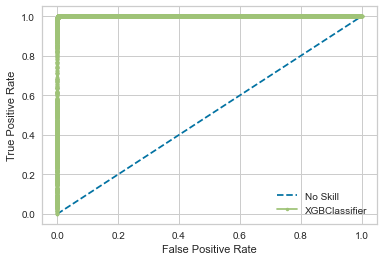

Confusion Matrix 
 [[6354370     102]
 [    860    7288]]


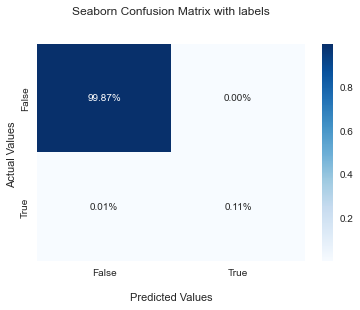

In [56]:
base_XGB_class = classification_report(y, y_pred)
print(base_XGB_class)

#plt.figure(figsize = [10, 8])
#PRCurve(model = XGB_class)
#plt.show()

#Plot ROC CURVE
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y))]
# keep probabilities for the positive outcome only
y_prob1 = y_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
xgb_auc = roc_auc_score(y, y_prob1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y, y_prob1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#confusion Matrix
conf_matrix= metrics.confusion_matrix(y, y_pred)
print('Confusion Matrix \n', conf_matrix)

ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
Accuracy_final=[]
Precision_final=[]
Recall_final=[]
Fscore_final=[]
logloss_final=[]
hamming_loss_final=[]

In [52]:
#Report save
#Accuracy
Accuracy_final.append(metrics.accuracy_score(y, y_pred) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_final.append(precision_score(y, y_pred, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_final.append(recall_score(y, y_pred, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_final.append(f1_score(y, y_pred, pos_label=1))
#logloss
logloss_final.append(multiclass_logloss(y, y_prob))
#hammingloss
hamming_loss_final.append(metrics.hamming_loss(y, y_pred))

In [53]:
result_df_scale_9= pd.DataFrame(Accuracy_final, index= ['XGB Classifier'], 
                              columns=['Accuracy']) 
result_df_scale_10= pd.DataFrame(Precision_final, index= ['XGB Classifier'], 
                              columns=['Precision'])
result_df_scale_11= pd.DataFrame(Recall_final, index= ['XGB Classifier'], 
                              columns=['Recall'])
result_df_scale_12= pd.DataFrame(Fscore_final, index= ['XGB Classifier'], 
                              columns=['F_score'])
result_df_scale_13= pd.DataFrame(logloss_final, index= ['XGB Classifier'], 
                              columns=['log-loss'])
result_df_scale_14= pd.DataFrame(hamming_loss_final, index= ['XGB Classifier'], 
                              columns=['Hamming_loss'])

In [54]:
Model_scale_3 = pd.concat([result_df_scale_9, result_df_scale_10, result_df_scale_11,
                           result_df_scale_12, result_df_scale_13, result_df_scale_14], axis=1)

In [55]:
Model_scale_3

,Accuracy,Precision,Recall,F_score,log-loss,Hamming_loss
XGB Classifier,99.98488,0.986198,0.894453,0.938087,0.007295,0.000151


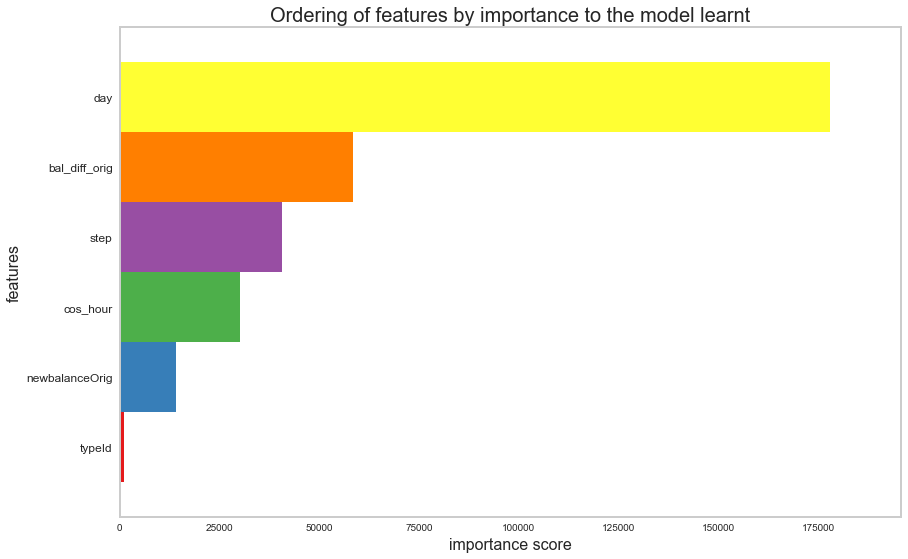

In [57]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(XGB_class, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax, max_num_features=6);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

#### Inference:
- The figure shows that the new feature bal_diff_orig, bal_diff_dest, errorBalanceOrig that we created is the most relevant feature for the model. The features are ordered based on the number of samples affected by splits on those features.

# Deployment
## Saving Model (and anything else as pickle file)

In [58]:
from joblib import dump, load
import joblib

In [59]:
joblib.dump(XGB_class, 'fraudpredmodel.pkl') 

['fraudpredmodel.pkl']

In [60]:
X.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'bal_diff_orig', 'typeId', 'day', 'weekday',
       'sin_hour', 'cos_hour'],
      dtype='object')

In [61]:
list(X.columns)

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'bal_diff_orig',
 'typeId',
 'day',
 'weekday',
 'sin_hour',
 'cos_hour']

In [62]:
joblib.dump(list(X.columns),'fraudcolumn_names.pkl')

['fraudcolumn_names.pkl']

## Conclusion & Recommendation

- We have seen the importance of all features(bal_diff_orig, bal_diff_dest, step, errorBalanceOrig, newbalanceOrig, type) and we have removed un important features like(nameOrig, nameDest, isFlaggedFraud).
- We have generated 5 more features i.e. bal_diff_orig, bal_diff_dest, errorBalanceOrig, errorBalanceDest and diff_category from which bal_diff_orig, bal_diff_dest & errorBalanceOrig were potential features to identify fraud transaction.
- To deal with the large skewed data, we chose an appropriate procedure i.e. manually dropped records of sender's data containing 0s on both before and after balances and replacing -1 for receiver side identifying that amount was transfered but still showing 0 balances before and after transaction.
- To deal with the imbalanced data we have used Min Max Scaler & Box Cox Transformation and then performed the model building.
- We developed different machine learning algorithms i.e. Random Forest Classifier, XGB Classifier and Ada Boost Classifier modeling.
- XGB Classifier outperformed all the models achieving almost perfect F1-Score with good log-loss and hamming-loss. We have verified the result with confusion matrix plot.

# With this our Part 2 is ended next we will work on deployment.